1. Implement depth first search algorithm and Breadth First Search algorithm, Use an undirected 
graph and develop a recursive algorithm for searching all the vertices of a graph or tree data 
structure.  

In [35]:
# Cell 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque
import time

In [36]:
# Cell 2: Create an undirected graph class
class Graph:
    def __init__(self):
        # Initialize an empty dictionary to store the graph
        # Each key is a vertex and value is a list of adjacent vertices
        self.graph = {}
    
    def add_vertex(self, vertex):
        # Add a vertex if it doesn't exist already
        if vertex not in self.graph:
            self.graph[vertex] = []
    
    def add_edge(self, vertex1, vertex2):
        # Add an edge between vertex1 and vertex2
        # First ensure both vertices exist
        self.add_vertex(vertex1)
        self.add_vertex(vertex2)
        # Add vertex2 to vertex1's list
        if vertex2 not in self.graph[vertex1]:
            self.graph[vertex1].append(vertex2)
        # Add vertex1 to vertex2's list (undirected graph)
        if vertex1 not in self.graph[vertex2]:
            self.graph[vertex2].append(vertex1)
    
    def get_vertices(self):
        # Return all vertices in the graph
        return list(self.graph.keys())
    
    def get_neighbors(self, vertex):
        # Return all neighbors of a vertex
        return self.graph[vertex]

In [37]:
# Cell 3: Create a graph for testing
def create_test_graph():
    # Create a simple undirected graph for testing
    g = Graph()
    # Add edges (automatically adds vertices)
    edges = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6), (3, 7), (4, 7), (5, 8), (6, 8)]
    for v1, v2 in edges:
        g.add_edge(v1, v2)
    return g

In [38]:
# Cell 4: Create visualization functions
def create_nx_graph(graph):
    # Convert our graph to NetworkX graph for visualization
    G = nx.Graph()
    # Add all edges
    for vertex, neighbors in graph.graph.items():
        for neighbor in neighbors:
            G.add_edge(vertex, neighbor)
    return G

In [39]:
# Cell 5: Define the graph drawing function
def draw_graph(G, visited=None, current=None, queue=None, title="Graph"):
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G, seed=42)  # Consistent layout
    
    # Default node and edge colors
    node_color = ['lightblue'] * len(G.nodes())
    edge_color = ['black'] * len(G.edges())
    
    # Highlight visited nodes
    if visited is not None:
        for i, node in enumerate(G.nodes()):
            if node in visited:
                node_color[i] = 'green'  # Visited nodes are green
    
    # Highlight current node
    if current is not None:
        for i, node in enumerate(G.nodes()):
            if node == current:
                node_color[i] = 'red'  # Current node is red
    
    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_color=node_color, 
            edge_color=edge_color, node_size=500, font_weight='bold')
    
    # Show queue or stack if provided
    if queue is not None:
        queue_text = "Queue/Stack: " + str(queue)
        plt.text(0.5, -0.1, queue_text, horizontalalignment='center',
                 transform=plt.gca().transAxes)
    
    plt.title(title)
    plt.tight_layout()
    plt.show()
    # Short pause to see the animation clearly in the notebook
    time.sleep(0.5)


In [40]:
# Cell 6: Define recursive DFS implementation
def dfs_recursive(graph, vertex, visited=None, G_nx=None, show_steps=True):
    # Initialize visited if it's not provided
    if visited is None:
        visited = set()
    
    # Mark the current vertex as visited
    visited.add(vertex)
    
    # Visualize the current step if show_steps is True
    if show_steps and G_nx is not None:
        draw_graph(G_nx, visited=visited, current=vertex, 
                  title=f"DFS - Visiting vertex {vertex}")
    
    # Process current vertex
    print(f"Visited vertex: {vertex}")
    
    # Recursively visit all unvisited neighbors
    for neighbor in graph.get_neighbors(vertex):
        if neighbor not in visited:
            dfs_recursive(graph, neighbor, visited, G_nx, show_steps)
    
    return visited

In [41]:
# Cell 7: Define BFS implementation
def bfs(graph, start_vertex, G_nx=None, show_steps=True):
    # Initialize visited set and queue
    visited = set()
    queue = deque([start_vertex])
    visited.add(start_vertex)
    
    # Visualize initial state
    if show_steps and G_nx is not None:
        draw_graph(G_nx, visited=visited, current=start_vertex, queue=list(queue),
                  title=f"BFS - Starting at vertex {start_vertex}")
    
    # Process all vertices in the queue
    while queue:
        # Get the next vertex from the queue
        current = queue.popleft()
        print(f"Visited vertex: {current}")
        
        # Process all unvisited neighbors
        for neighbor in graph.get_neighbors(current):
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
                
                # Visualize each step
                if show_steps and G_nx is not None:
                    draw_graph(G_nx, visited=visited, current=neighbor, queue=list(queue),
                              title=f"BFS - Visiting vertex {neighbor}")
    
    return visited


In [42]:
# Cell 8: Initialize the graph for testing
g = create_test_graph()
G_nx = create_nx_graph(g)


C:\Users\DELL\AppData\Local\Temp\ipykernel_5832\1191188111.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


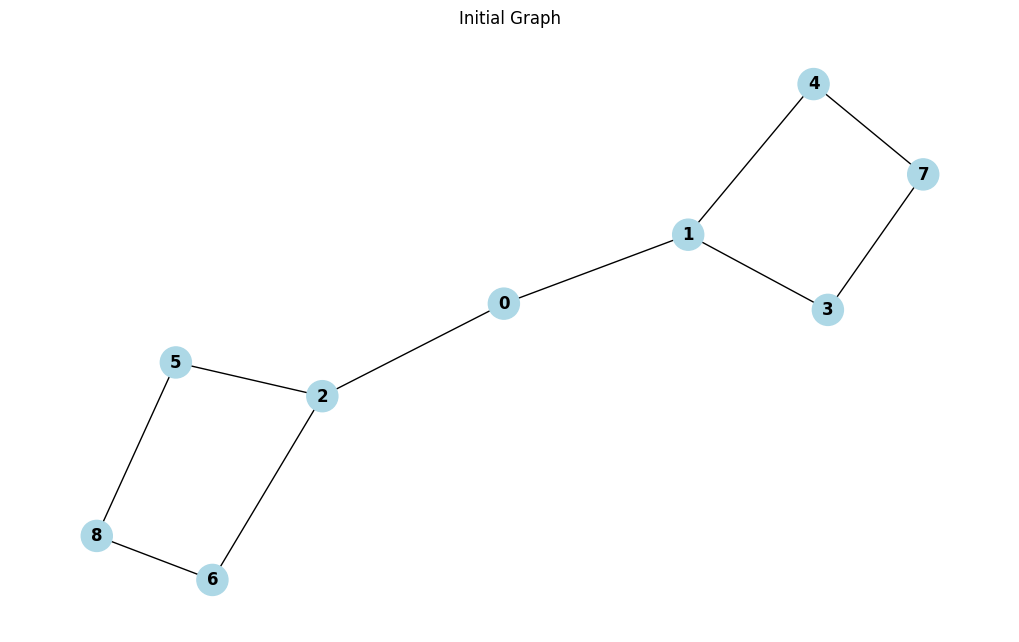

In [43]:
# Cell 9: Display the initial graph
draw_graph(G_nx, title="Initial Graph")


Starting Depth First Search (DFS):


C:\Users\DELL\AppData\Local\Temp\ipykernel_5832\1191188111.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


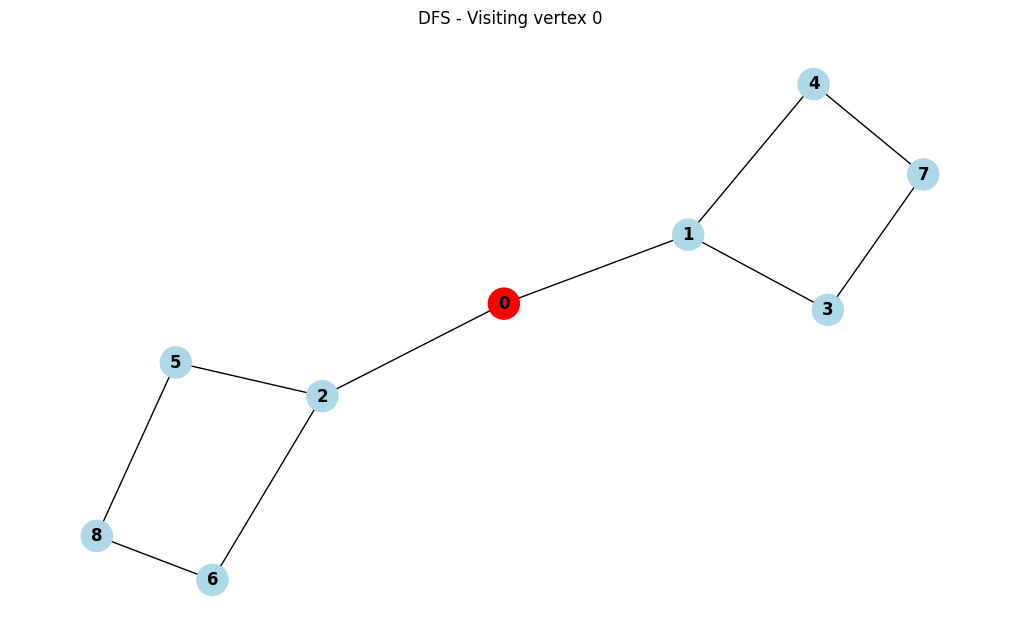

Visited vertex: 0


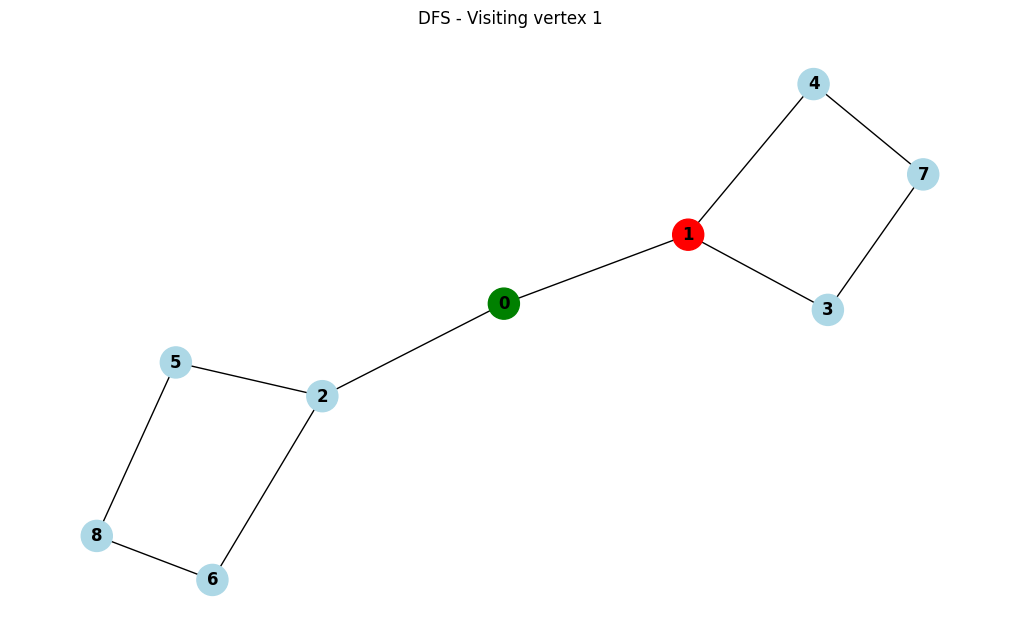

Visited vertex: 1


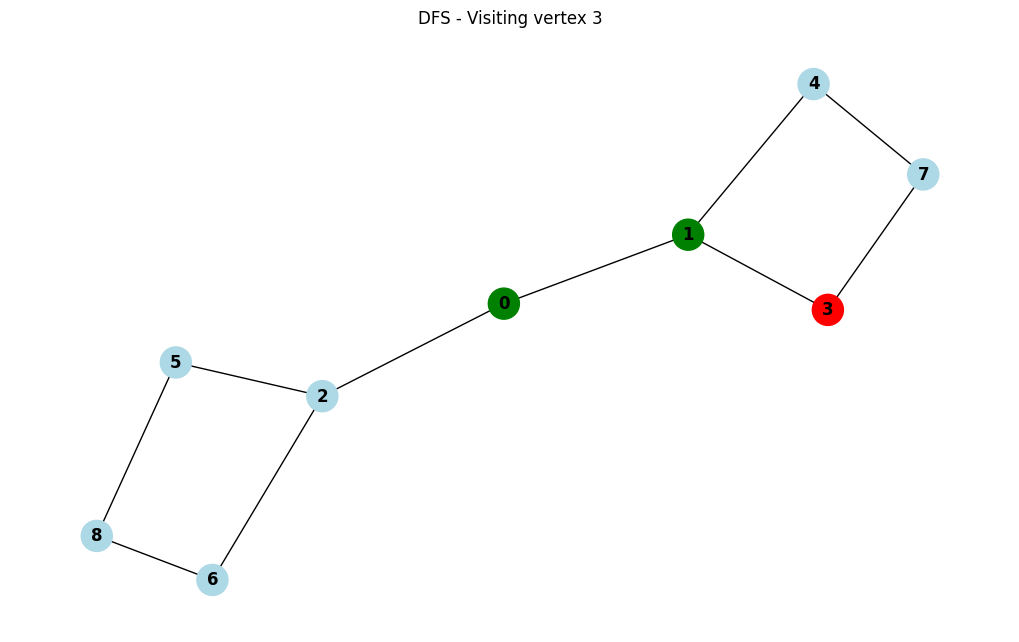

Visited vertex: 3


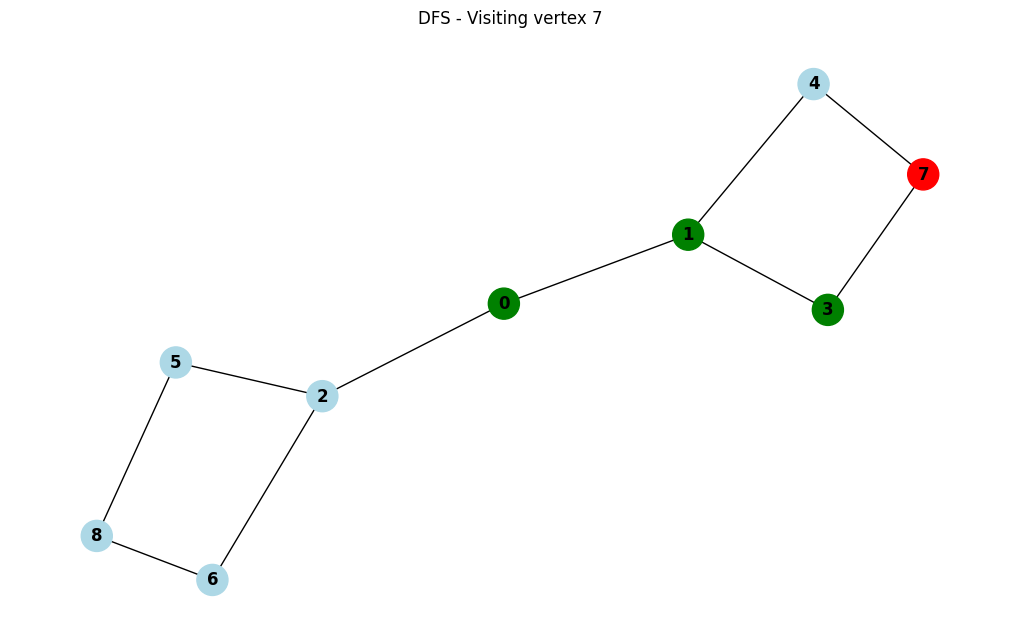

Visited vertex: 7


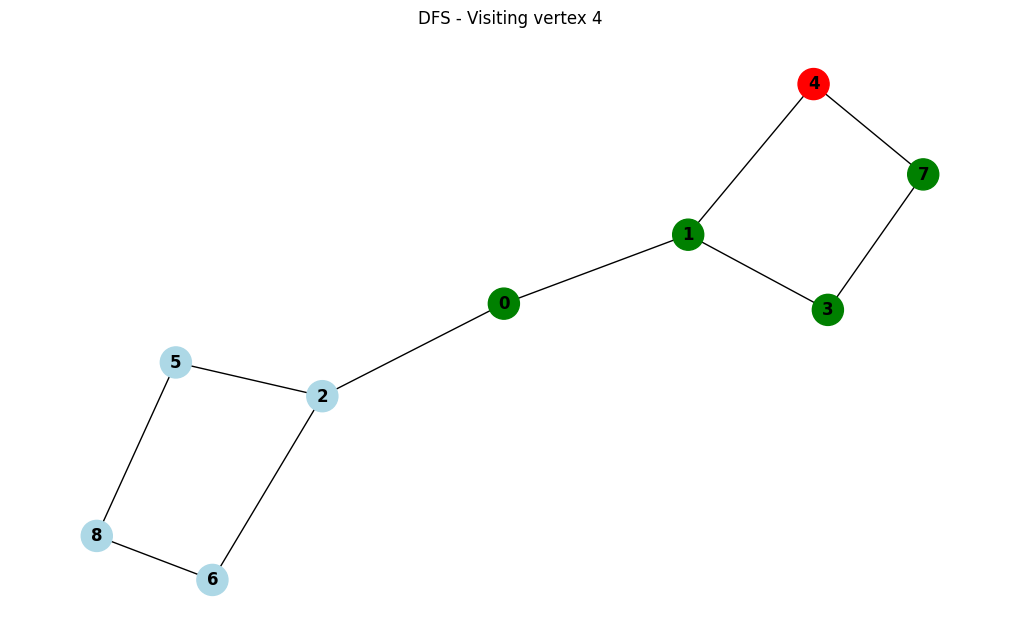

Visited vertex: 4


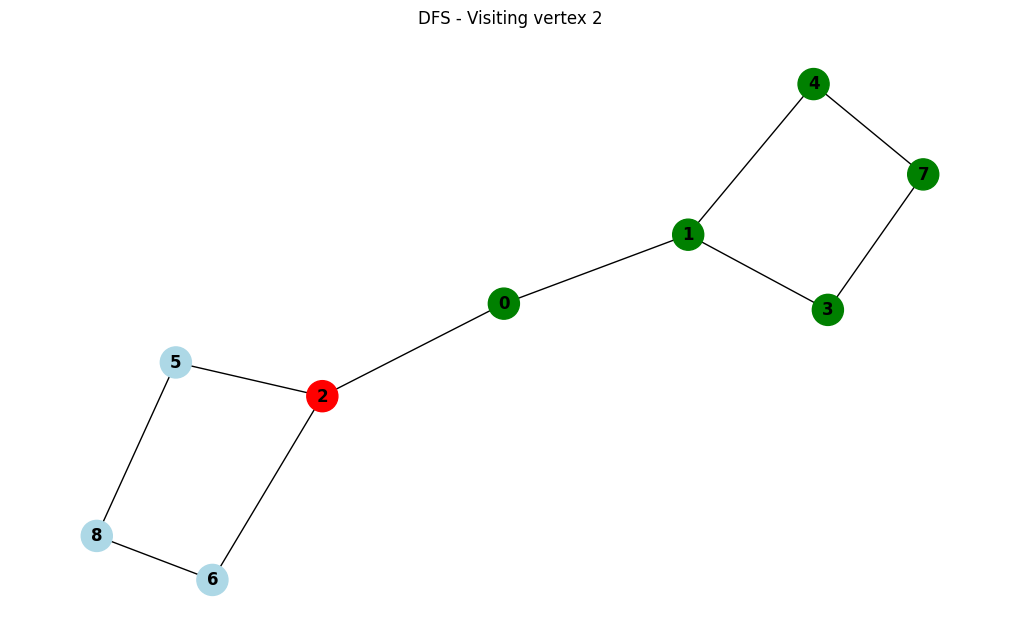

Visited vertex: 2


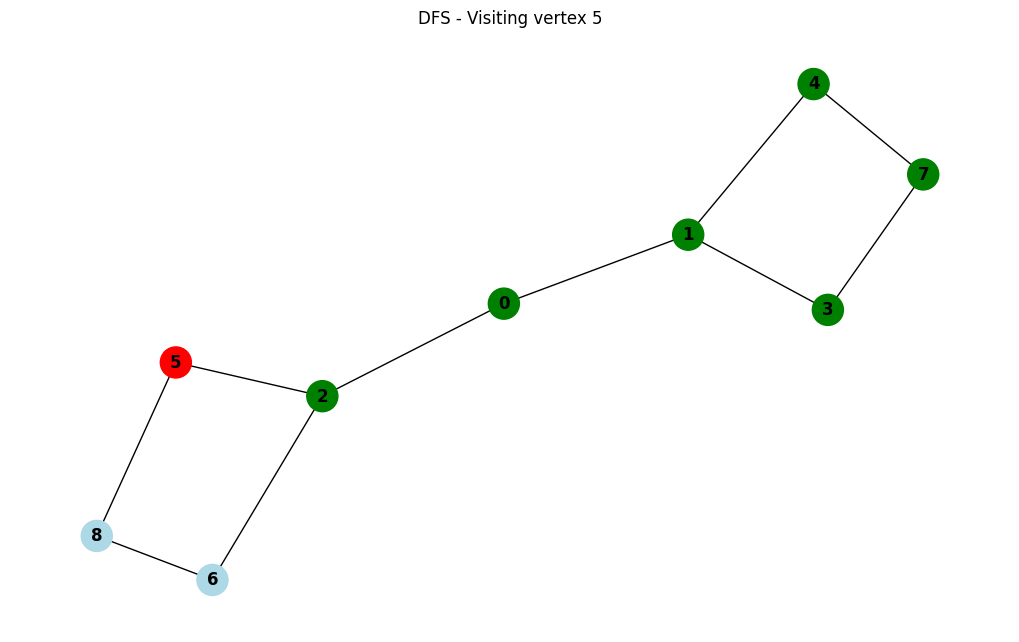

Visited vertex: 5


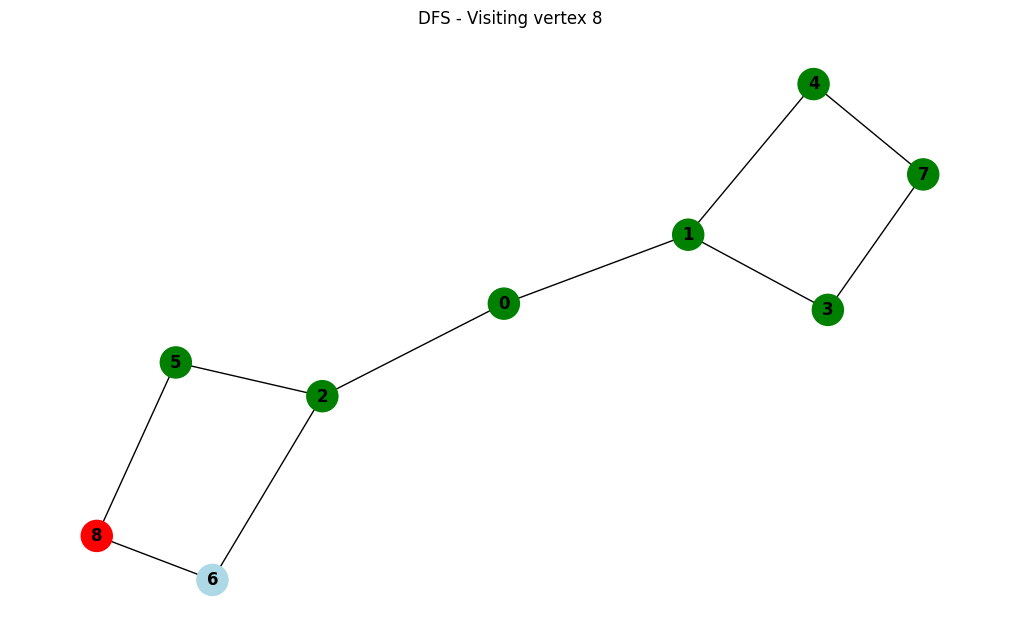

Visited vertex: 8


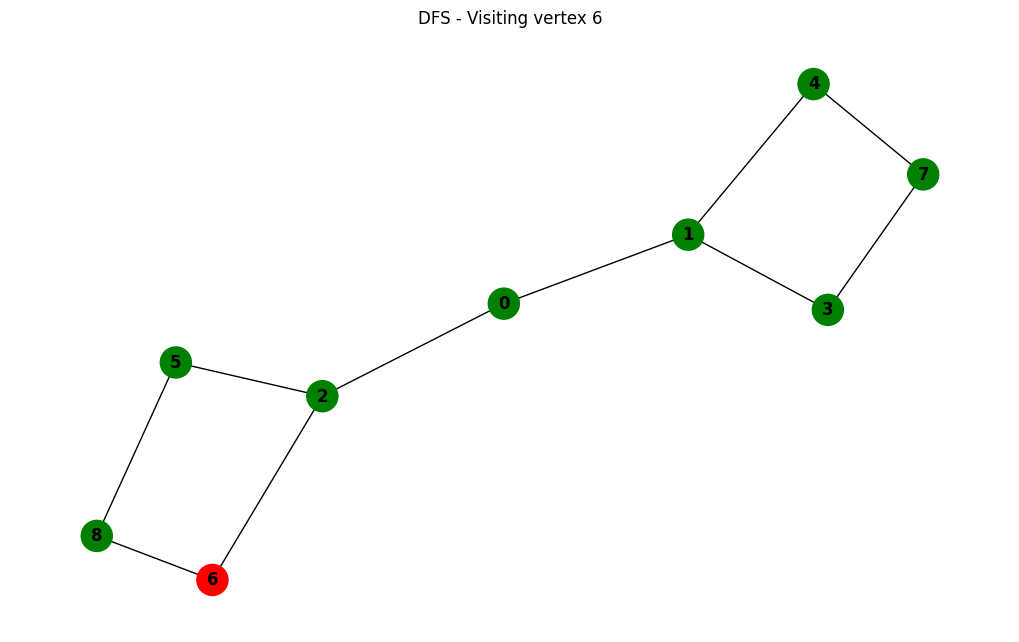

Visited vertex: 6
DFS traversal order from vertex 0: [0, 1, 2, 3, 4, 5, 6, 7, 8]


In [44]:
# Cell 10: Run recursive DFS
print("Starting Depth First Search (DFS):")
start_vertex = 0  # Start from vertex 0
dfs_visited = dfs_recursive(g, start_vertex, None, G_nx)
print(f"DFS traversal order from vertex {start_vertex}: {list(dfs_visited)}")



Starting Breadth First Search (BFS):


C:\Users\DELL\AppData\Local\Temp\ipykernel_5832\1191188111.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


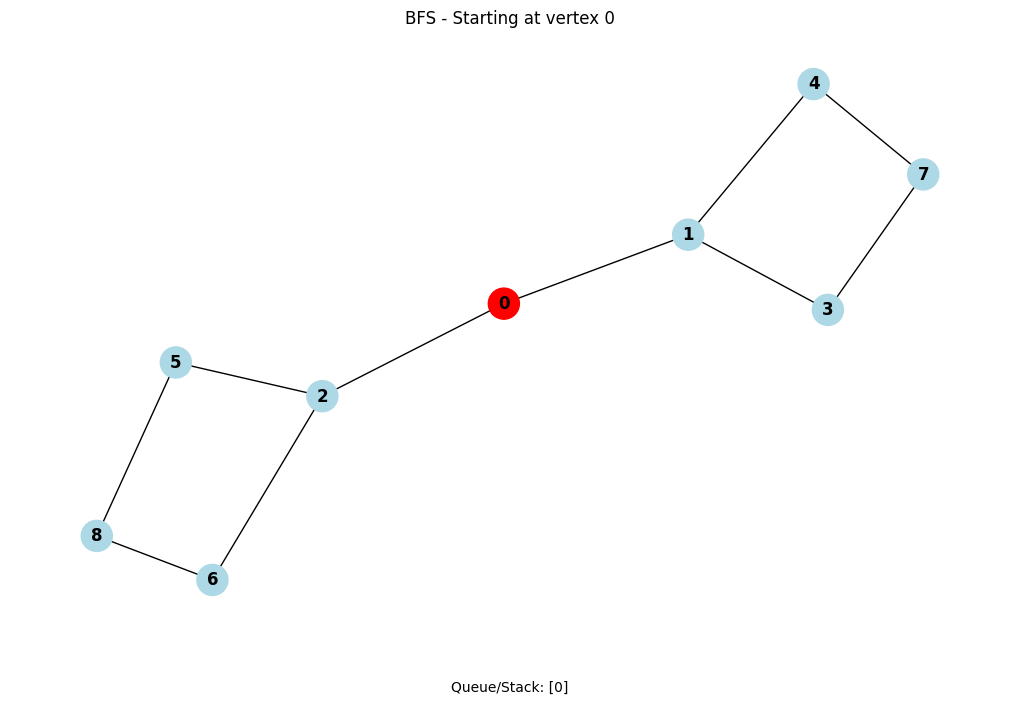

Visited vertex: 0


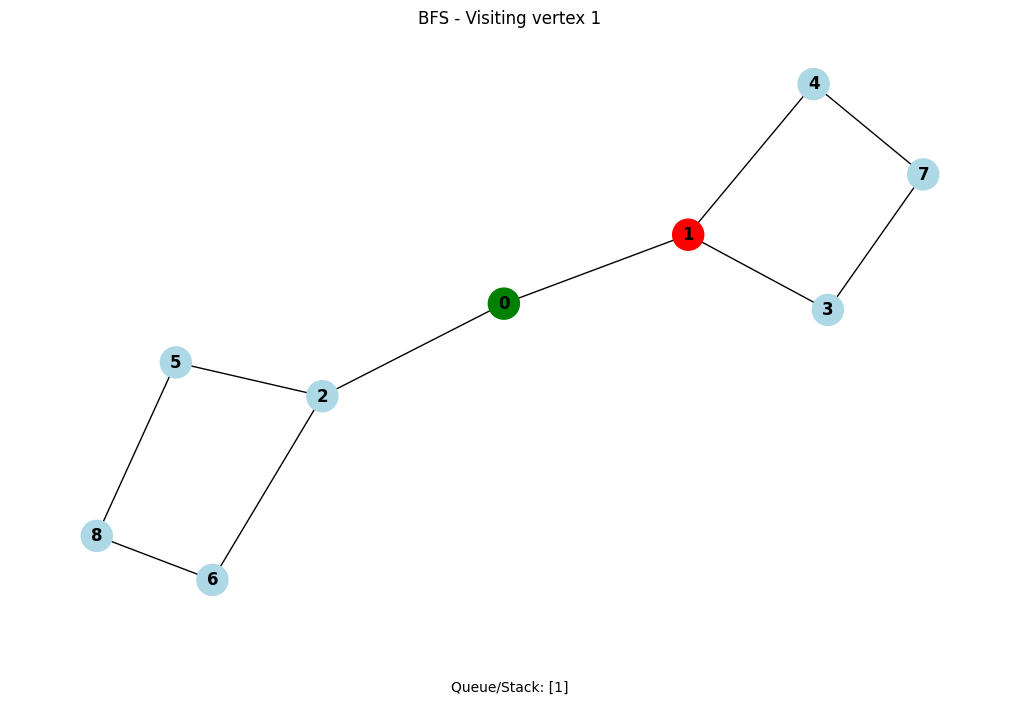

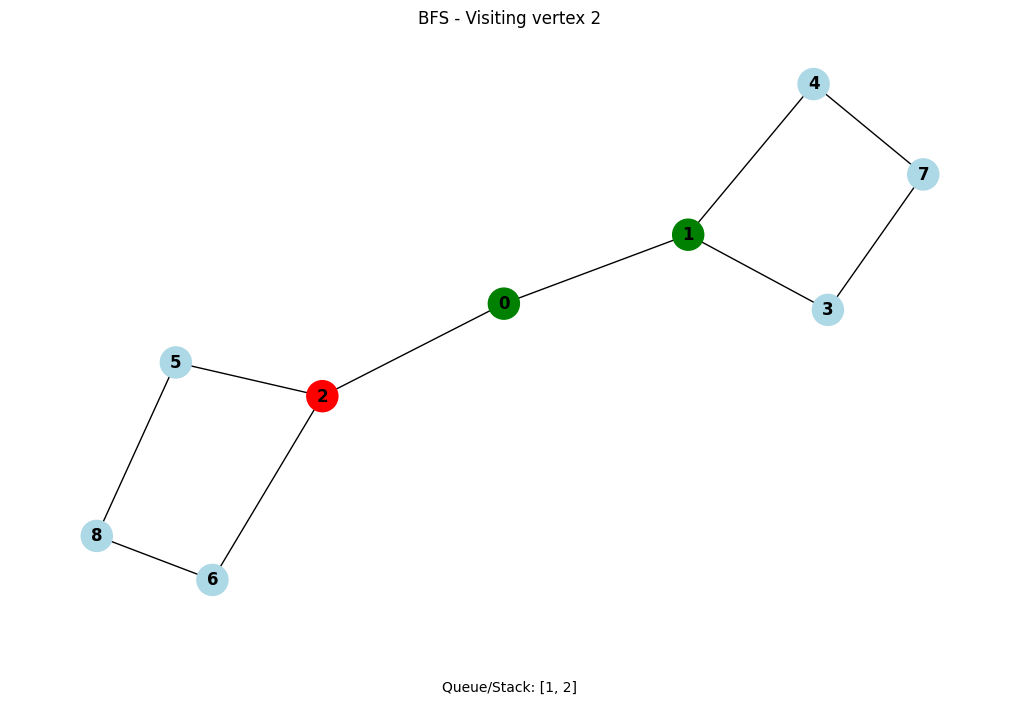

Visited vertex: 1


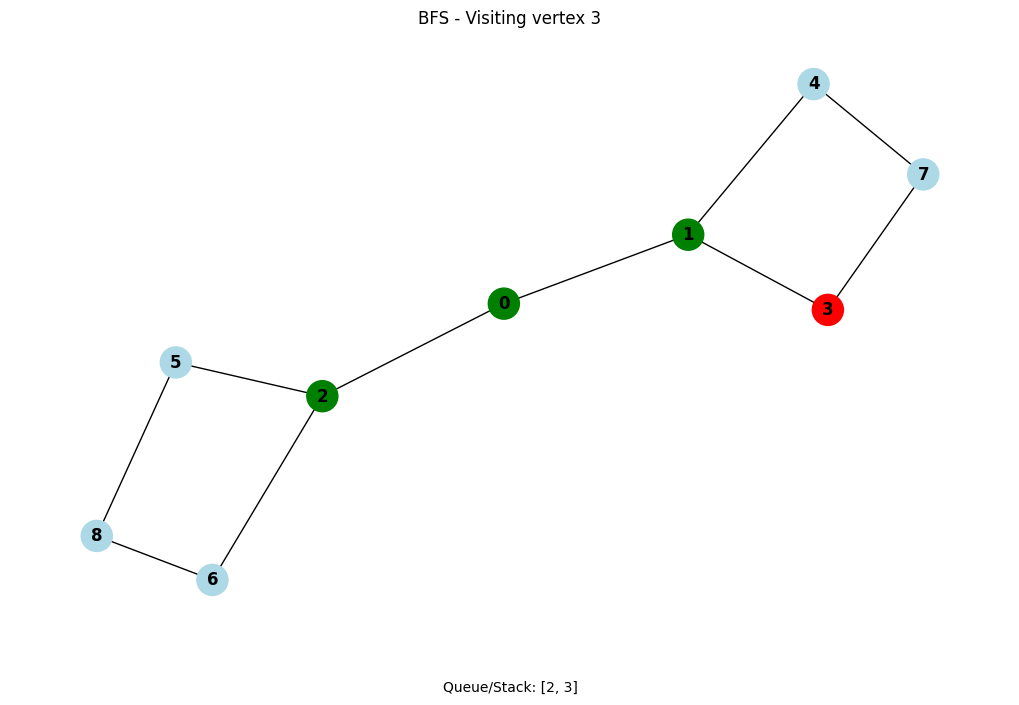

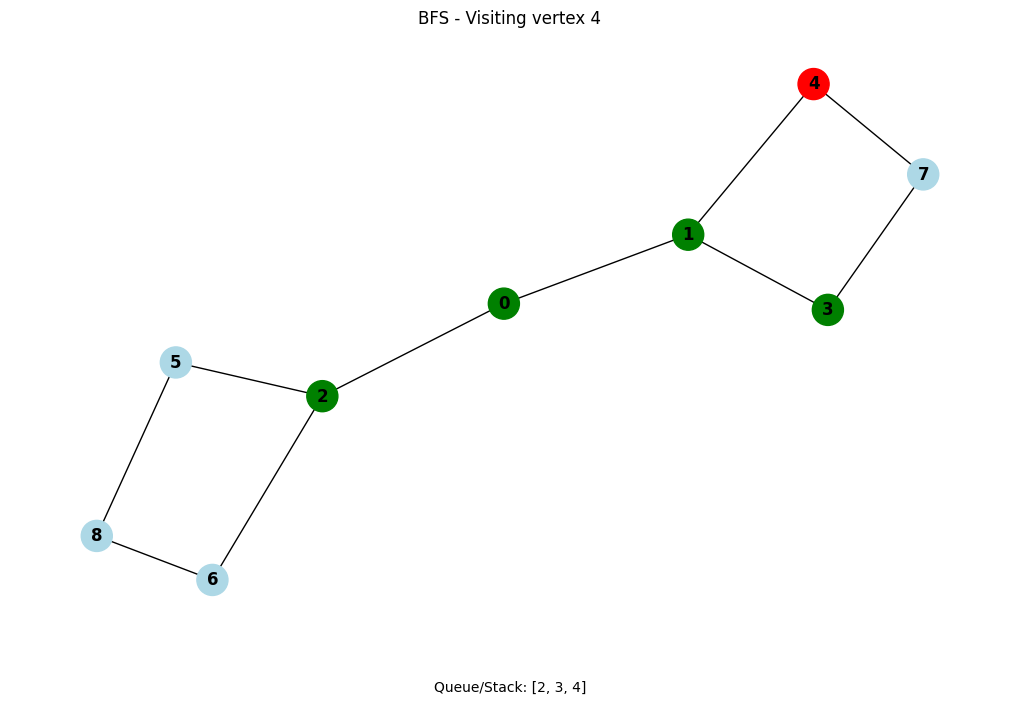

Visited vertex: 2


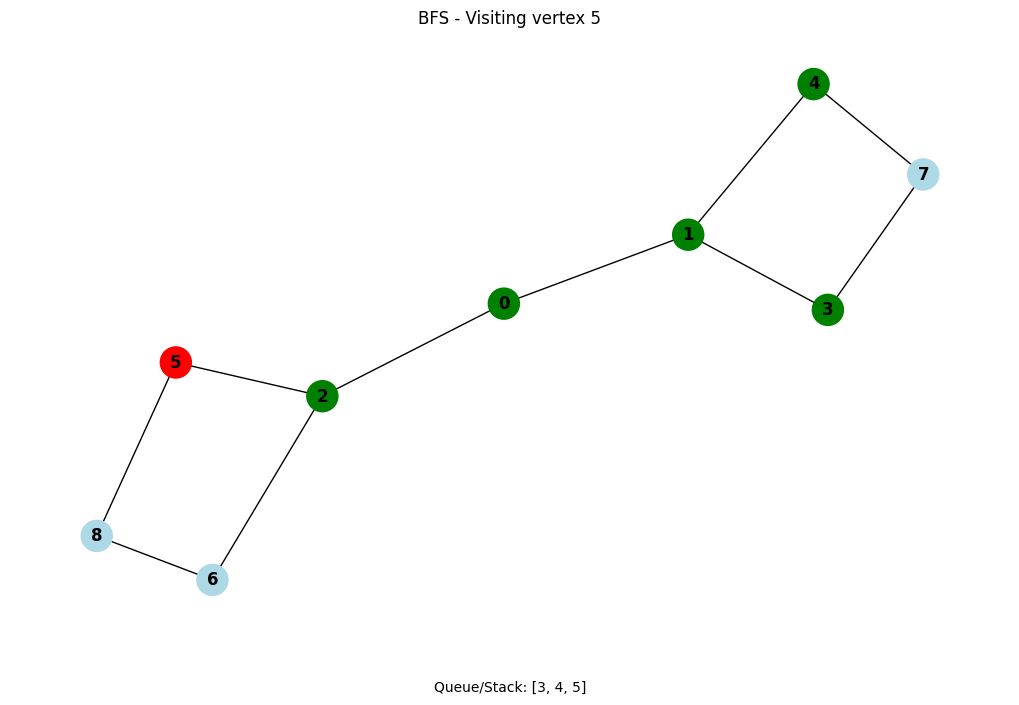

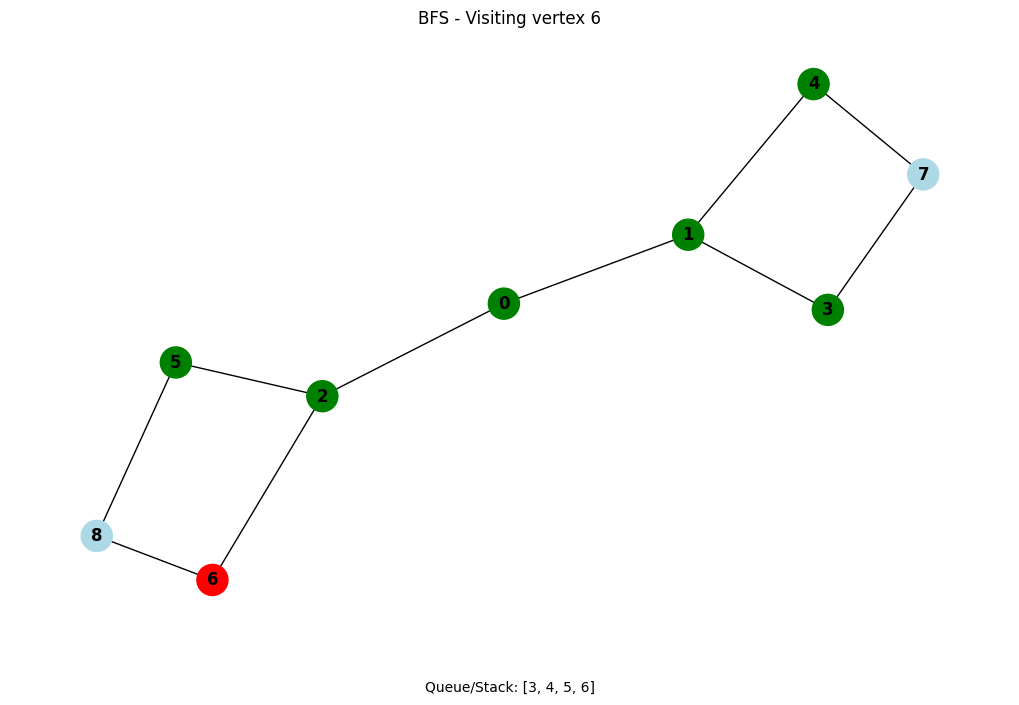

Visited vertex: 3


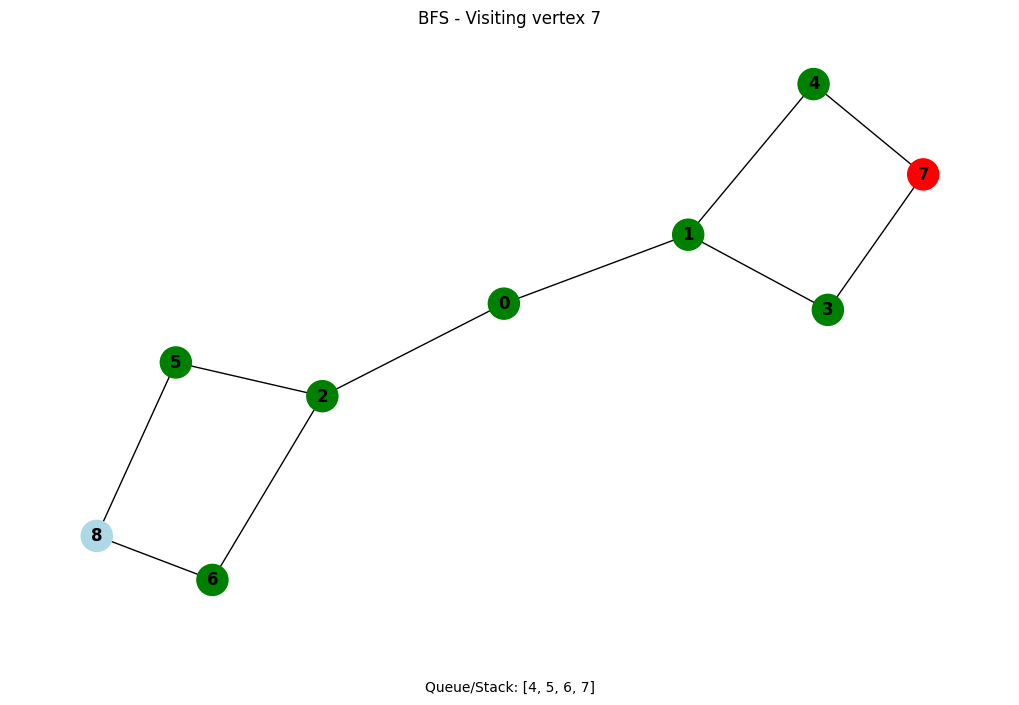

Visited vertex: 4
Visited vertex: 5


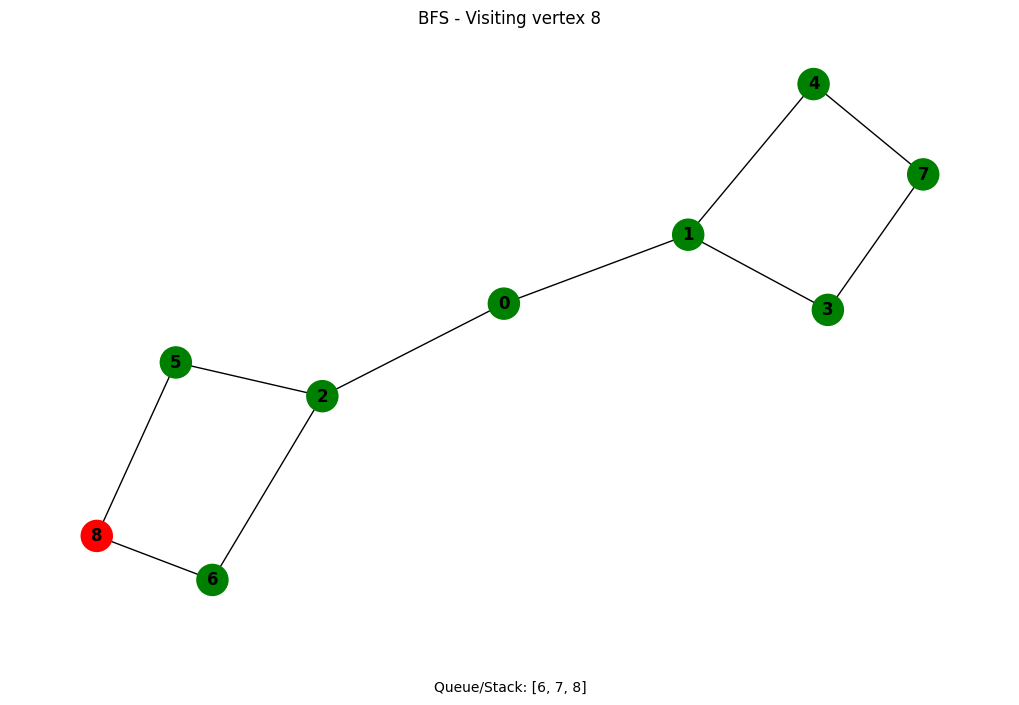

Visited vertex: 6
Visited vertex: 7
Visited vertex: 8
BFS traversal order from vertex 0: [0, 1, 2, 3, 4, 5, 6, 7, 8]


In [45]:
# Cell 11: Run BFS
print("\nStarting Breadth First Search (BFS):")
start_vertex = 0  # Start from vertex 0
bfs_visited = bfs(g, start_vertex, G_nx)
print(f"BFS traversal order from vertex {start_vertex}: {list(bfs_visited)}")


In [46]:
# Cell 12: Compare DFS and BFS traversal orders
print("\nComparison of traversal orders:")
print(f"DFS traversal: {list(dfs_visited)}")
print(f"BFS traversal: {list(bfs_visited)}")


Comparison of traversal orders:
DFS traversal: [0, 1, 2, 3, 4, 5, 6, 7, 8]
BFS traversal: [0, 1, 2, 3, 4, 5, 6, 7, 8]


C:\Users\DELL\AppData\Local\Temp\ipykernel_5832\1191188111.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


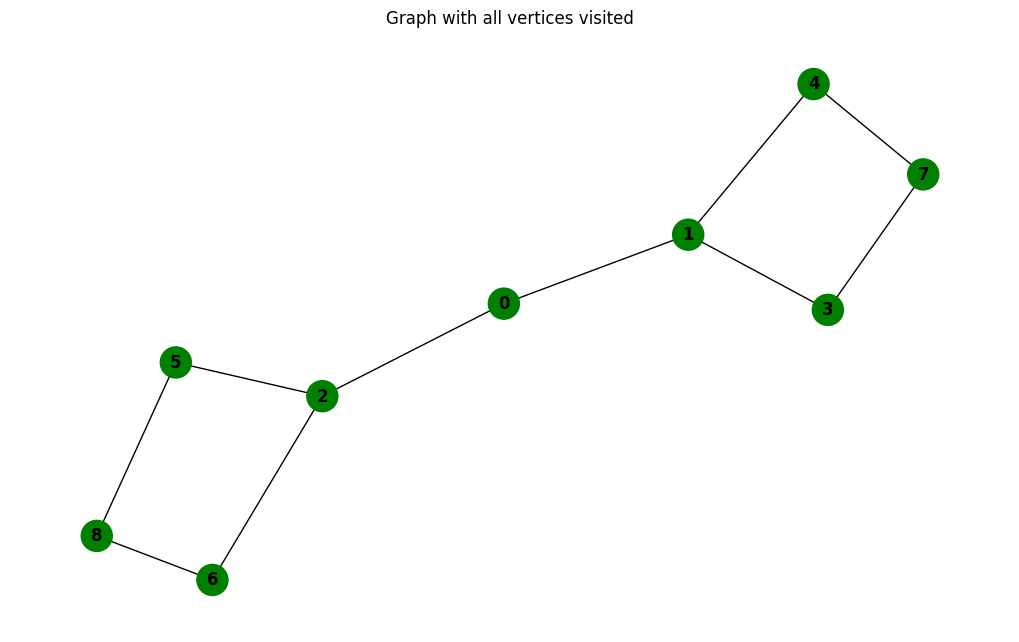

In [47]:
# Cell 13: Final visualization with all nodes visited
draw_graph(G_nx, visited=set(g.get_vertices()), title="Graph with all vertices visited")